In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

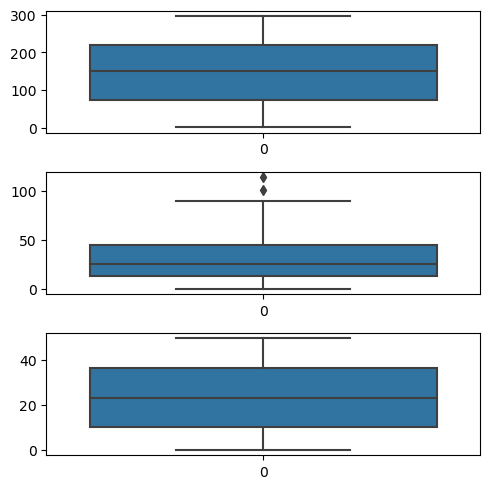

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1=sns.boxplot(df['TV'],ax = axs[0])
plt2=sns.boxplot(df['Newspaper'],ax = axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

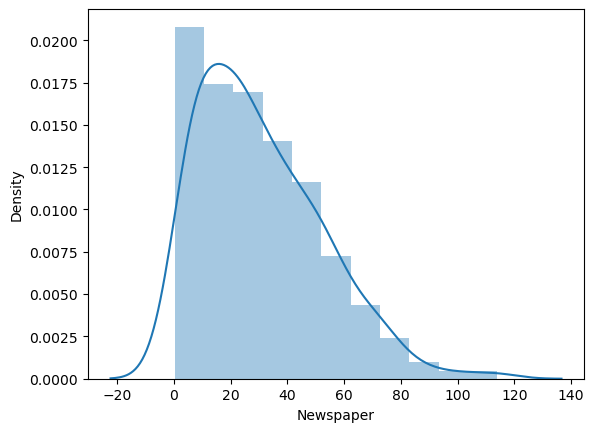

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge=df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data=df.copy()

In [15]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot:>

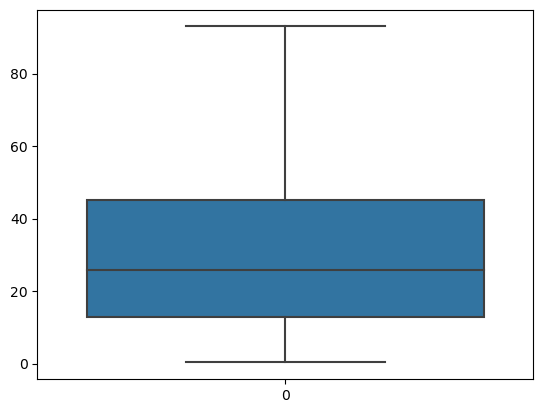

In [16]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:>

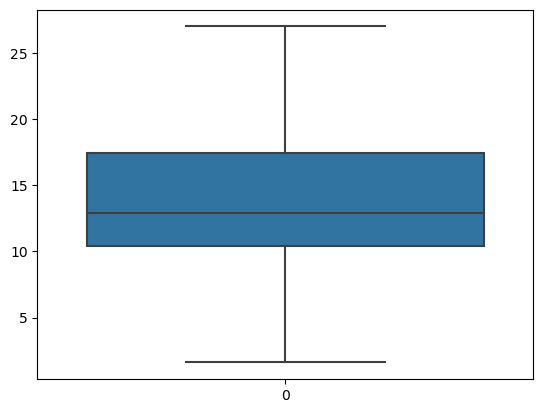

In [17]:
sns.boxplot(data['Sales'])

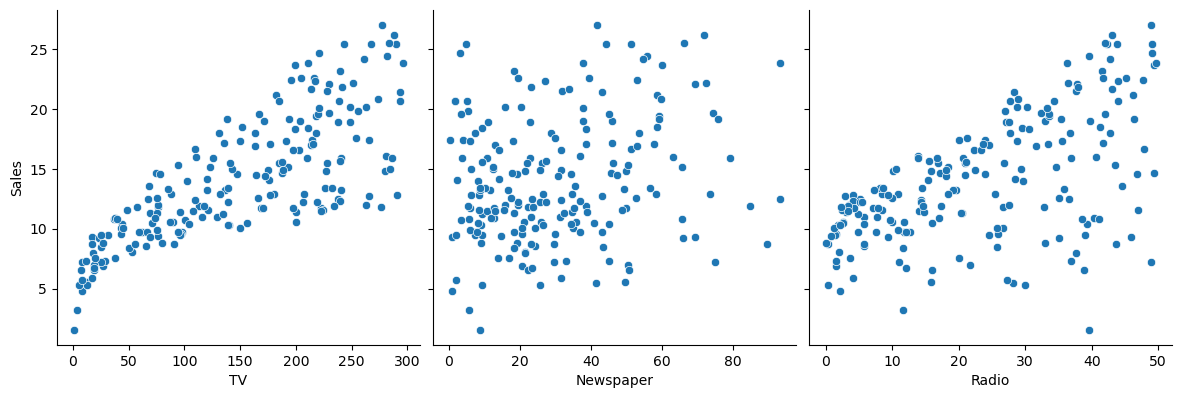

In [18]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

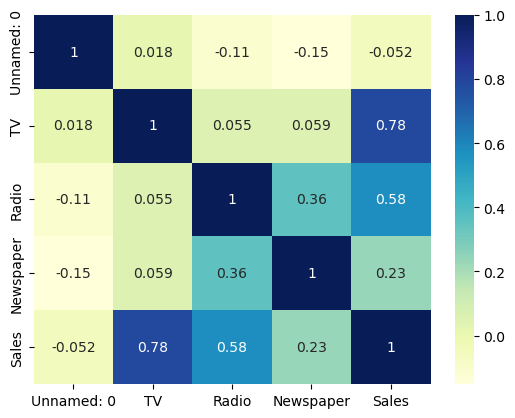

In [19]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [20]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
x=data['TV']
y=data['Sales']

In [23]:
x = x.values.reshape(-1,1)

In [24]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [28]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred=knn.predict(x_train)

In [32]:
knn_test_pred=knn.predict(x_test)

In [33]:
print(knn_train_pred,knn_test_pred)

[ 7.72 17.24 16.38 11.04 19.22 14.36 11.04  7.18 20.3  13.24 19.22 11.14
 15.7  19.48 12.74 15.76 14.6  11.04  7.7  19.36 19.16 13.52 10.76  8.08
 19.36 15.1  13.34 19.4  12.36  6.28 16.34 12.58 20.96 12.82 14.34 15.92
 15.1  19.36 17.34 12.58 19.9  18.92 15.84  7.18 19.36 11.14 17.24 14.42
 18.54 15.24 15.92 13.52 16.38 11.04  9.72 15.7  17.46 19.4  17.24  4.76
  5.88 12.6  15.1  18.92 14.12  6.3  21.44 16.32 13.52 19.   20.1  19.36
 20.22 19.22 18.14  7.18  7.36 11.14 19.36 18.44 11.14 16.52 15.1  13.24
 18.54 14.66  8.08 16.34  9.78  7.18  9.78 10.76  9.66  5.88 12.6  19.22
 17.02 10.76 17.24 11.04 18.14  7.72 11.14  7.38  5.88 17.24 10.82 13.56
 15.84 15.76 10.76  8.8  17.52 18.9   7.72 16.34 20.1  20.1  16.44 11.44
  9.78  6.28 13.56  9.78  8.08 12.36 15.76 13.52 13.24 14.36 10.76 13.52
 19.36 19.36] [15.24 16.32  9.78 11.14  4.76 15.7  15.84  7.36 19.36 11.04 13.24  9.3
 11.44  8.08 15.84 19.   13.24 11.14  9.3  19.94 16.52 14.42 15.84 12.58
 14.12 14.42 15.   12.36  9.28 19.22 1

In [34]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [35]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"K-Nearest-Neighbors","Train_R2":r2_train,"Test_R2":r2,"Test_RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.46960710805767036
RMSE: 3.7624105747955436


In [36]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test_R2,Test_RMSE,Train_R2
0,K-Nearest-Neighbors,NaN,NaN,NaN,0.224397,0.469607,3.762411,0.694004


In [37]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [38]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[ 7.51716587 17.08135832 17.60617522 10.76849317 17.74233803 13.46360208
 10.78023273  7.59173125 17.28882409 13.67742116 17.74658378 10.40187769
 16.01668635 17.26693003 12.73499584 15.1649401  15.65630134 10.82699701
  7.81252806 17.33374588 17.20964014 12.48153475 11.78319199  7.83866286
 17.02167441 14.01202846 11.3513553  17.16753526 11.43050976  7.29816733
 16.60241814 12.78312836 17.74030441 13.54101178 13.12017646 17.44567396
 14.12341463 16.46468043 17.68379151 12.90261619 17.59051449 17.37284552
 14.93621956  7.5988632  16.57859742 10.25988819 17.06424197 15.39176096
 16.4997805  15.86823434 17.44567396 12.5189328  17.61706534 10.83282049
  9.19064647 16.04717816 16.8334048  17.16396571 17.04002585  7.20586743
  7.28395759 17.52971281 14.11891827 17.3874125  13.33474232  7.36333073
 17.7001     17.56051249 13.82099623 16.79471053 17.50165195 16.606714
 17.23356967 17.73302914 16.31192265  7.57068516  7.40052657 10.35269316
 17.06797571 17.27999852 10.21010429 17.72177422 14.2

In [40]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train_R2":r2_train,"Test_R2":r2,"Test_RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.49852970826306353
RMSE: 3.658389513651138


In [41]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test_R2,Test_RMSE,Train_R2
0,K-Nearest-Neighbors,NaN,NaN,NaN,0.224397,0.469607,3.762411,0.694004
1,Support Vector Machine,NaN,NaN,NaN,0.119799,0.498530,3.658390,0.618329


In [42]:
import statsmodels.api as sm

In [43]:
x_train_constant=sm.add_constant(x_train)

In [44]:
model=sm.OLS(y_train,x_train_constant).fit()

In [45]:
model.params

const    7.030091
x1       0.048513
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     232.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           6.36e-31
Time:                        07:22:25   Log-Likelihood:                -343.50
No. Observations:                 134   AIC:                             691.0
Df Residuals:                     132   BIC:                             696.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0301      0.538     13.059      0.0

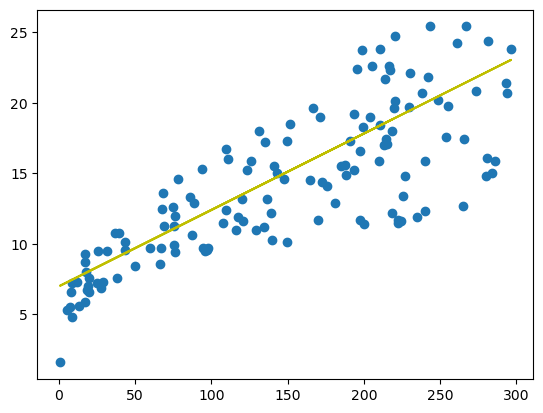

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train,'y')
plt.show()

In [48]:
y_train_pred=model.predict(x_train_constant)
res = (y_train-y_train_pred)
res


192   -1.964508
102   -5.823331
124    1.536260
82     0.616908
111    3.044406
         ...   
99     3.611001
34    -2.172750
94    -0.740348
59     1.148297
20     0.374750
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([ 7.86450794, 20.62333072, 18.16374017, 10.68309198, 18.75559431,
       13.5453374 , 10.69279451,  7.97123573, 20.3079986 , 13.7976031 ,
       18.82836326, 10.38716491, 16.14076333, 17.52822466, 12.65755619,
       15.34030486, 15.80117489, 10.73160462,  8.24290648, 17.63010119,
       17.44575318, 12.35677786, 11.59998077,  8.27201406, 17.19833875,
       14.17600164, 11.18762338, 17.38753802, 11.26039233,  7.44729928,
       16.72291493, 12.71577135, 19.08062895, 13.6375114 , 13.12812874,
       17.81930047, 14.29728323, 21.40923539, 18.40630334, 12.86130926,
       19.70644194, 17.69316762, 15.12199801,  7.98093826, 21.27340002,
       10.27558586, 20.64758704, 15.55376045, 16.61618714, 16.00007669,
       17.81930047, 12.40043923, 18.19284775, 10.73645588,  9.45572234,
       16.16987091, 16.97518063, 17.38268676, 20.68154588,  7.06404947,
        7.40848918, 17.98424342, 14.29243196, 17.71742394, 13.39009697,
        7.59768845, 19.34259718, 18.05216111, 13.96254605, 16.93

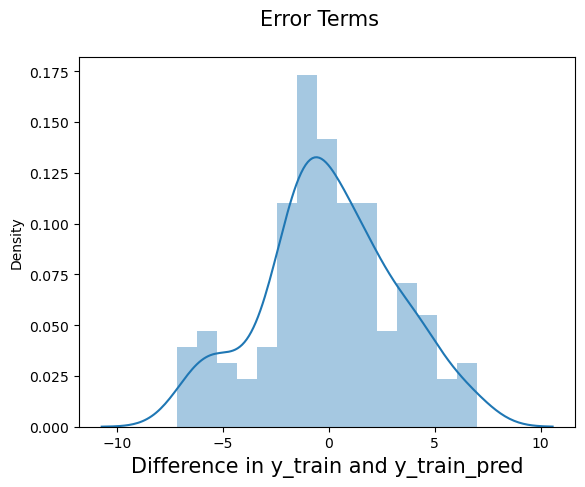

In [50]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize = 15)
plt.show()

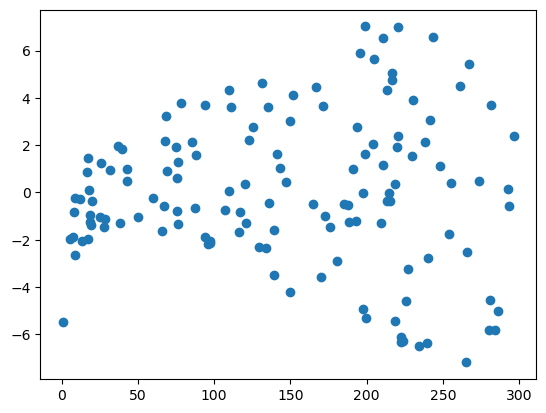

In [51]:
plt.scatter(x_train,res)
plt.show()

In [52]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [53]:
y_pred

array([16.00007669, 18.10552501,  9.75650067, 10.4550826 ,  7.22899243,
       16.14561459, 14.96190631,  7.66560614, 21.08420075, 10.6539844 ,
       13.8364132 ,  9.18890285, 10.92080389,  8.33022923, 15.19961822,
       16.85389905, 13.78790057, 10.37746239,  9.19860538, 17.06735464,
       18.54698998, 15.52465287, 15.06378285, 12.87586305, 13.41920455,
       15.61682688, 14.62716914, 11.41563276,  9.62551656, 18.67797409,
       20.78827368, 20.4535365 ,  8.18469132, 17.59129109, 18.66827156,
       19.20191054, 10.73645588, 18.54698998, 16.72291493, 21.13271338,
       14.95220379, 19.10003401, 13.71998288, 10.05242774,  9.37325086,
       11.9007591 , 18.09097122, 18.28987302, 11.69700604, 19.77435962,
       15.88849763, 19.78406215, 12.50716703,  7.43759676, 12.10451216,
       20.98232421,  9.81956709, 18.63916398, 12.01233816,  8.87357073,
       11.38167391, 17.06250337, 20.46323903, 15.61682688,  8.24775775,
       10.59091798])

In [54]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error (y_test,y_pred))

3.4507951056179205

In [56]:
r2=r2_score(y_test,y_pred)
r2

0.5538266058232684

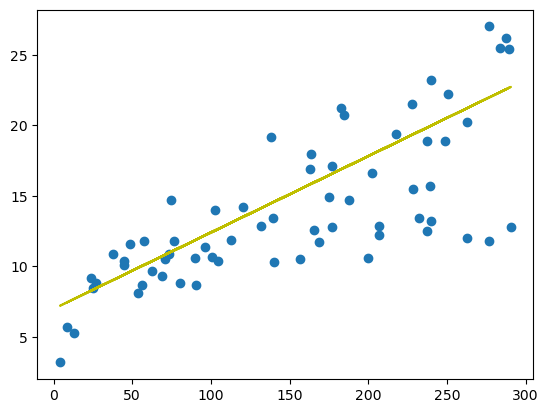

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()